In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import sys
import astropy.units as u
import secpy

#from secpy.universe import *
#import seaborn as sns
from secpy.utils import *


#from fisher import *
from secpy.profiles import*

import secpy.universe as su

from secpy.halo import HaloModel
from scipy.interpolate import interp1d
from scipy.integrate import simps

import matplotlib as pl
pl.rcParams['figure.figsize'] = 8,8
pl.rcParams['ytick.minor.visible'] =True
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['font.size'] = '22'
pl.rcParams['legend.fontsize'] = '16'
pl.rcParams['legend.borderaxespad'] = 1.0
#pl.rcParams['legend.numpoints'] = '1'



In [5]:
# Initialize cosmology and mass function
cosmo = su.Cosmo()
mf = MassFunction(cosmo)
h=0.7
mmin=1e12
mmax=1e16
zmin=0.1
zmax= 5.0

lmin=2
lmax=4500
lnum=20

ell_array = np.logspace(np.log10(lmin),np.log10(lmax),num=lnum)
hm = HaloModel(cosmo, mf, lrange=ell_array, npts=50, Mmin=mmin, Mmax=mmax, zmin=zmin, zmax=zmax)

/Users/anirbanroy/Documents/cross-project/Secpy/secpy/mass_func.py:192: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  self.nu_min, self.nu_max, epsabs=0.0, epsrel=default_precision["mass_precision"], limit=100)[0]


Mmin= 1000000000000.0
Mmax= 1e+16


In [6]:
# Initialize galaxy window function
z = np.linspace(0,5,num=1000)
nbar=get_nbar(z)

In [7]:
# Get the density profile and tau profile
et = ClusterElectronTau(cosmo) #Tau 
dens = ClusterDensity(cosmo, hmf=mf,  zgal=z, ngal=nbar) #galaxy overdensity profile

In [8]:
# Calculate the poewer spectra of galaxy over density field
clgg1h=hm.GetCl1Halo(dens.u_ell_1h)
clgg2h=hm.GetCl2Halo(dens.u_ell_2h)
clgg=clgg1h+ clgg2h

In [9]:
# Calculate the poewer spectra of tau-g cross correlation
cltg1h=hm.GetCl1Halo(et.tau_ell, k2=dens.u_ell_1h)
cltg2h=hm.GetCl2Halo(et.tau_ell, k2=dens.u_ell_2h)
cltg=cltg1h+ cltg2h

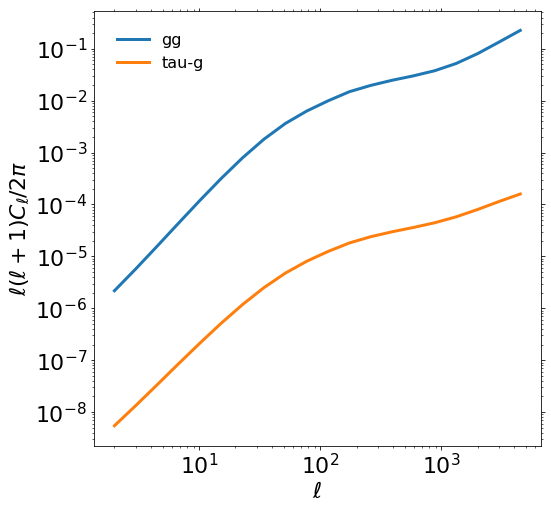

In [12]:
# Plot the tau-g and g-g power spectra
fac= ell_array* (ell_array+ 1)/ 2.0/np.pi
plt.loglog(ell_array,  fac* (clgg1h+clgg2h), lw=3,  label="gg")
plt.loglog(ell_array,  fac* (cltg1h+cltg2h), lw=3, label="tau-g")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell + 1) C_\ell /2\pi$")
plt.legend(loc=0, frameon=False)